In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('walmart-f.csv')

In [6]:
df

,item_id,timestamp,target_value,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
760,45,2010-04-30,737265.57,53.15,2.921,181.662036,8.899
761,45,2010-05-07,812190.76,70.75,2.966,181.646815,8.899
762,45,2010-05-14,758182.20,54.26,2.982,181.661279,8.899
763,45,2010-05-21,747888.25,62.62,2.958,181.853849,8.899


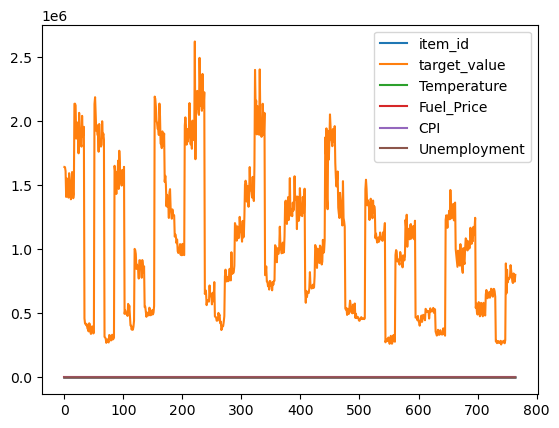

In [7]:
df.plot()
plt.show()

In [18]:
df_store = df[['timestamp','target_value']]

In [14]:
df_store

,timestamp,target_value
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
760,2010-04-30,737265.57
761,2010-05-07,812190.76
762,2010-05-14,758182.20
763,2010-05-21,747888.25


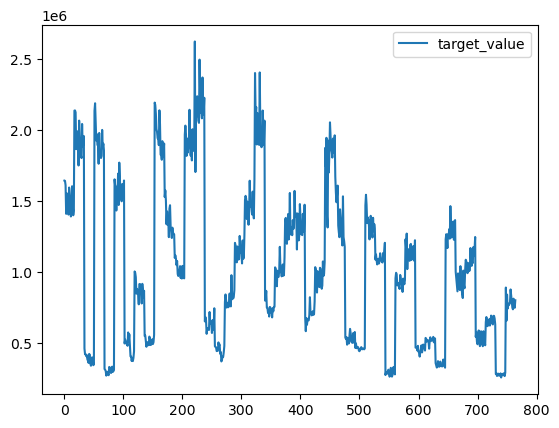

In [10]:
df_store.plot()
plt.show()

In [19]:
df_store['timestamp'] = pd.to_datetime(df_store['timestamp'])
df_store.set_index('timestamp',inplace=True)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
plt.rcParams['figure.figsize'] = 14,7

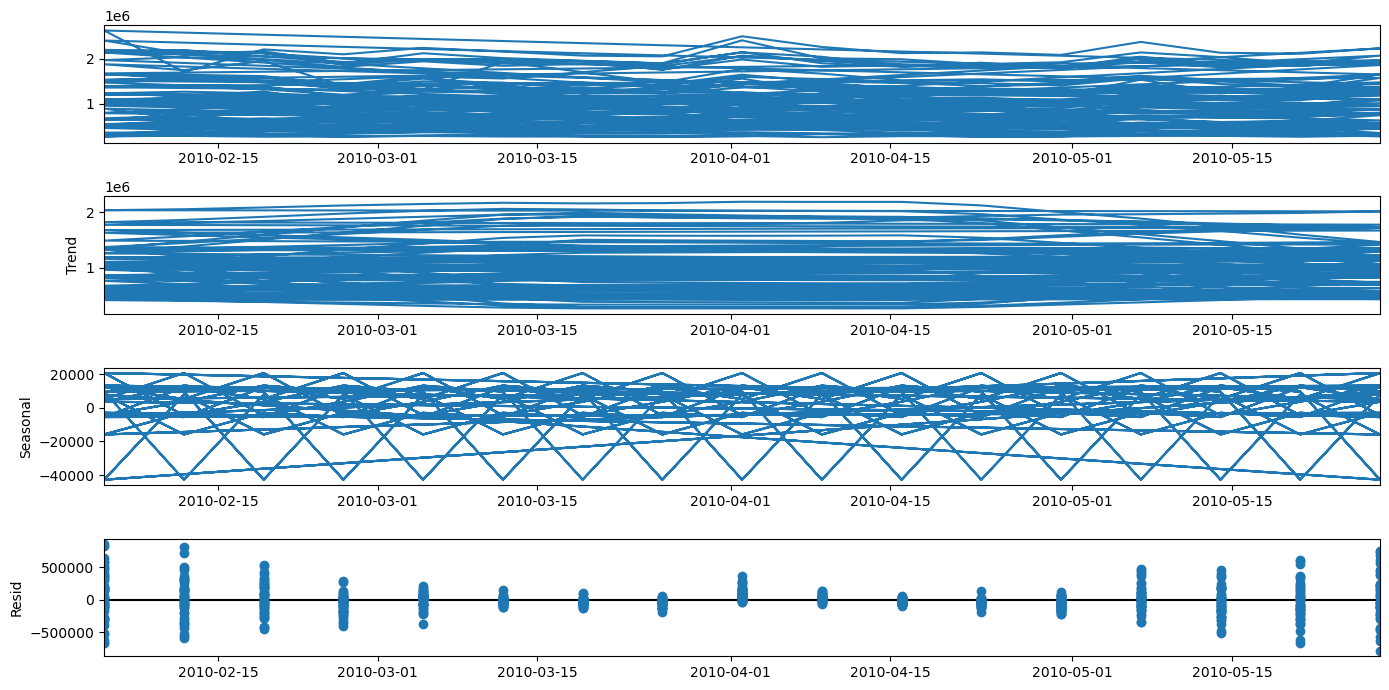

In [24]:
add = seasonal_decompose(df_store,model='additive',extrapolate_trend='freq',period=12).plot()

In [26]:
df_store_15 = df_store[1:16]

In [27]:
df_store_15

,target_value
timestamp,
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
2010-03-12,1439541.59
2010-03-19,1472515.79
2010-03-26,1404429.92
2010-04-02,1594968.28
2010-04-09,1545418.53


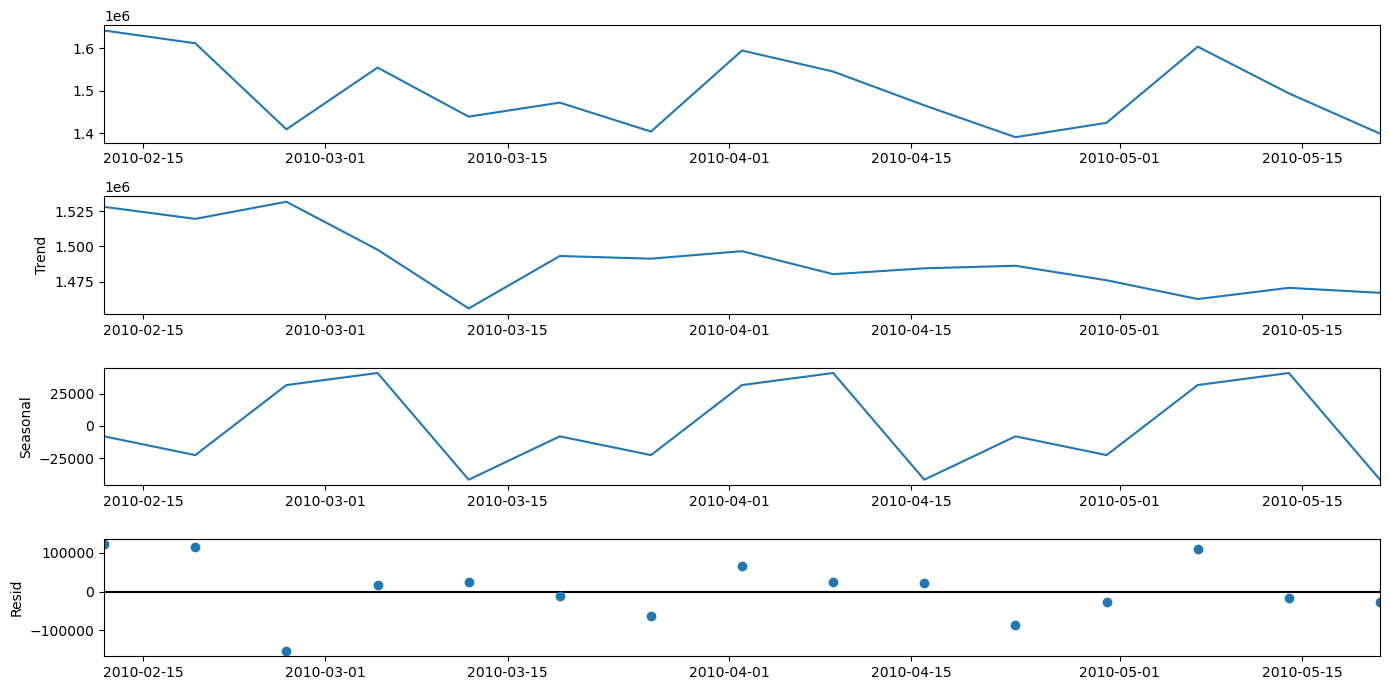

In [32]:
add = seasonal_decompose(df_store_15,model='additive',extrapolate_trend='freq',period=5).plot()

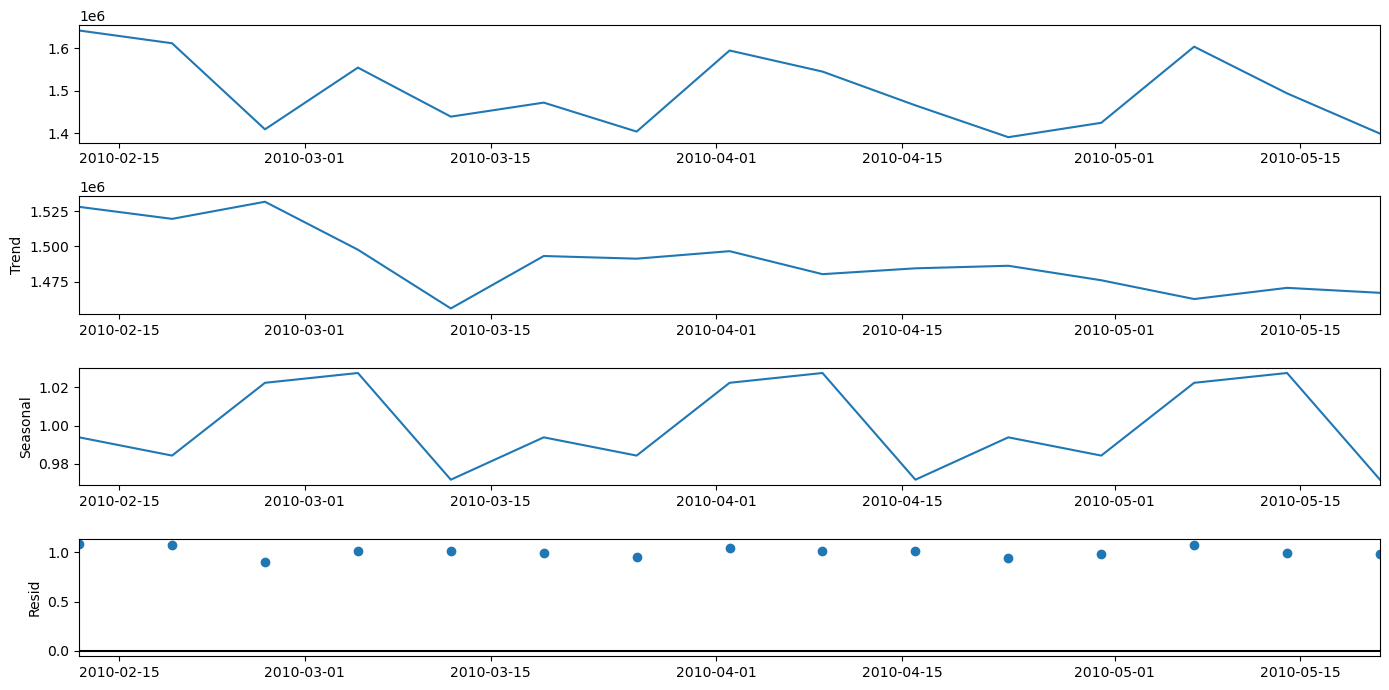

In [33]:
mul = seasonal_decompose(df_store_15,model='multiplicative',extrapolate_trend='freq',period=5).plot()

<Axes: xlabel='timestamp'>

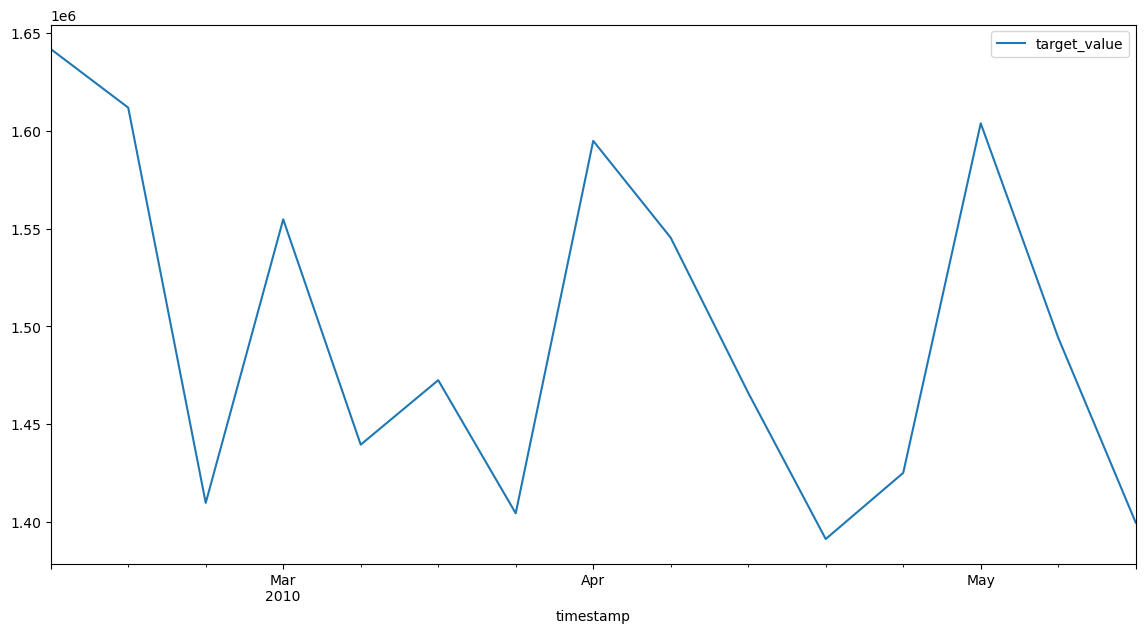

In [38]:
target = df_store_15[['target_value']]
target.rolling(1).mean().plot()